# Credit Risk Score Prediction

#### Client: FinSure Loans Pvt. Ltd.

## 1. Importing Libraries & Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [2]:
df_customers = pd.read_csv('customers.csv')
df_loans = pd.read_csv('loans.csv')
df_bureau = pd.read_csv('bureau_data.csv')

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [5]:
df_loans.head(2)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [6]:
df_bureau.head(2)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4


In [7]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [8]:
df = pd.merge(df, df_bureau)
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
# Converting values of default column from boolean to integer values

df['default'] = df['default'].astype(int)
df['default'].value_counts(normalize=True)*100

default
0   91.41
1    8.59
Name: proportion, dtype: float64

### Splitting data into training and test set before performing EDA & FE to avoid the risk of data leakage

In [11]:
X = df.drop('default', axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [12]:
df_train = pd.concat([X_train, y_train], axis=1)

In [13]:
df_test = pd.concat([X_test, y_test], axis=1)

In [14]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

## 2. Data Cleaning

In [15]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [16]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [17]:
mode_residence = df_train['residence_type'].mode()[0]
mode_residence

'Owned'

In [18]:
# Replacing NaN values with 'Owned'

df_train.fillna({'residence_type': mode_residence}, inplace=True)
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [19]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [20]:
# Replacing NaN values in test data set as well

df_test.fillna({'residence_type': mode_residence}, inplace=True)
df_test.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [21]:
# Checking for duplicate values
df_train.duplicated().sum()

np.int64(0)

In [22]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [23]:
numeric_cols = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 'sanction_amount', 'loan_amount', 'processing_fee',
               'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 
                'number_of_closed_accounts', 'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

categorical_cols = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

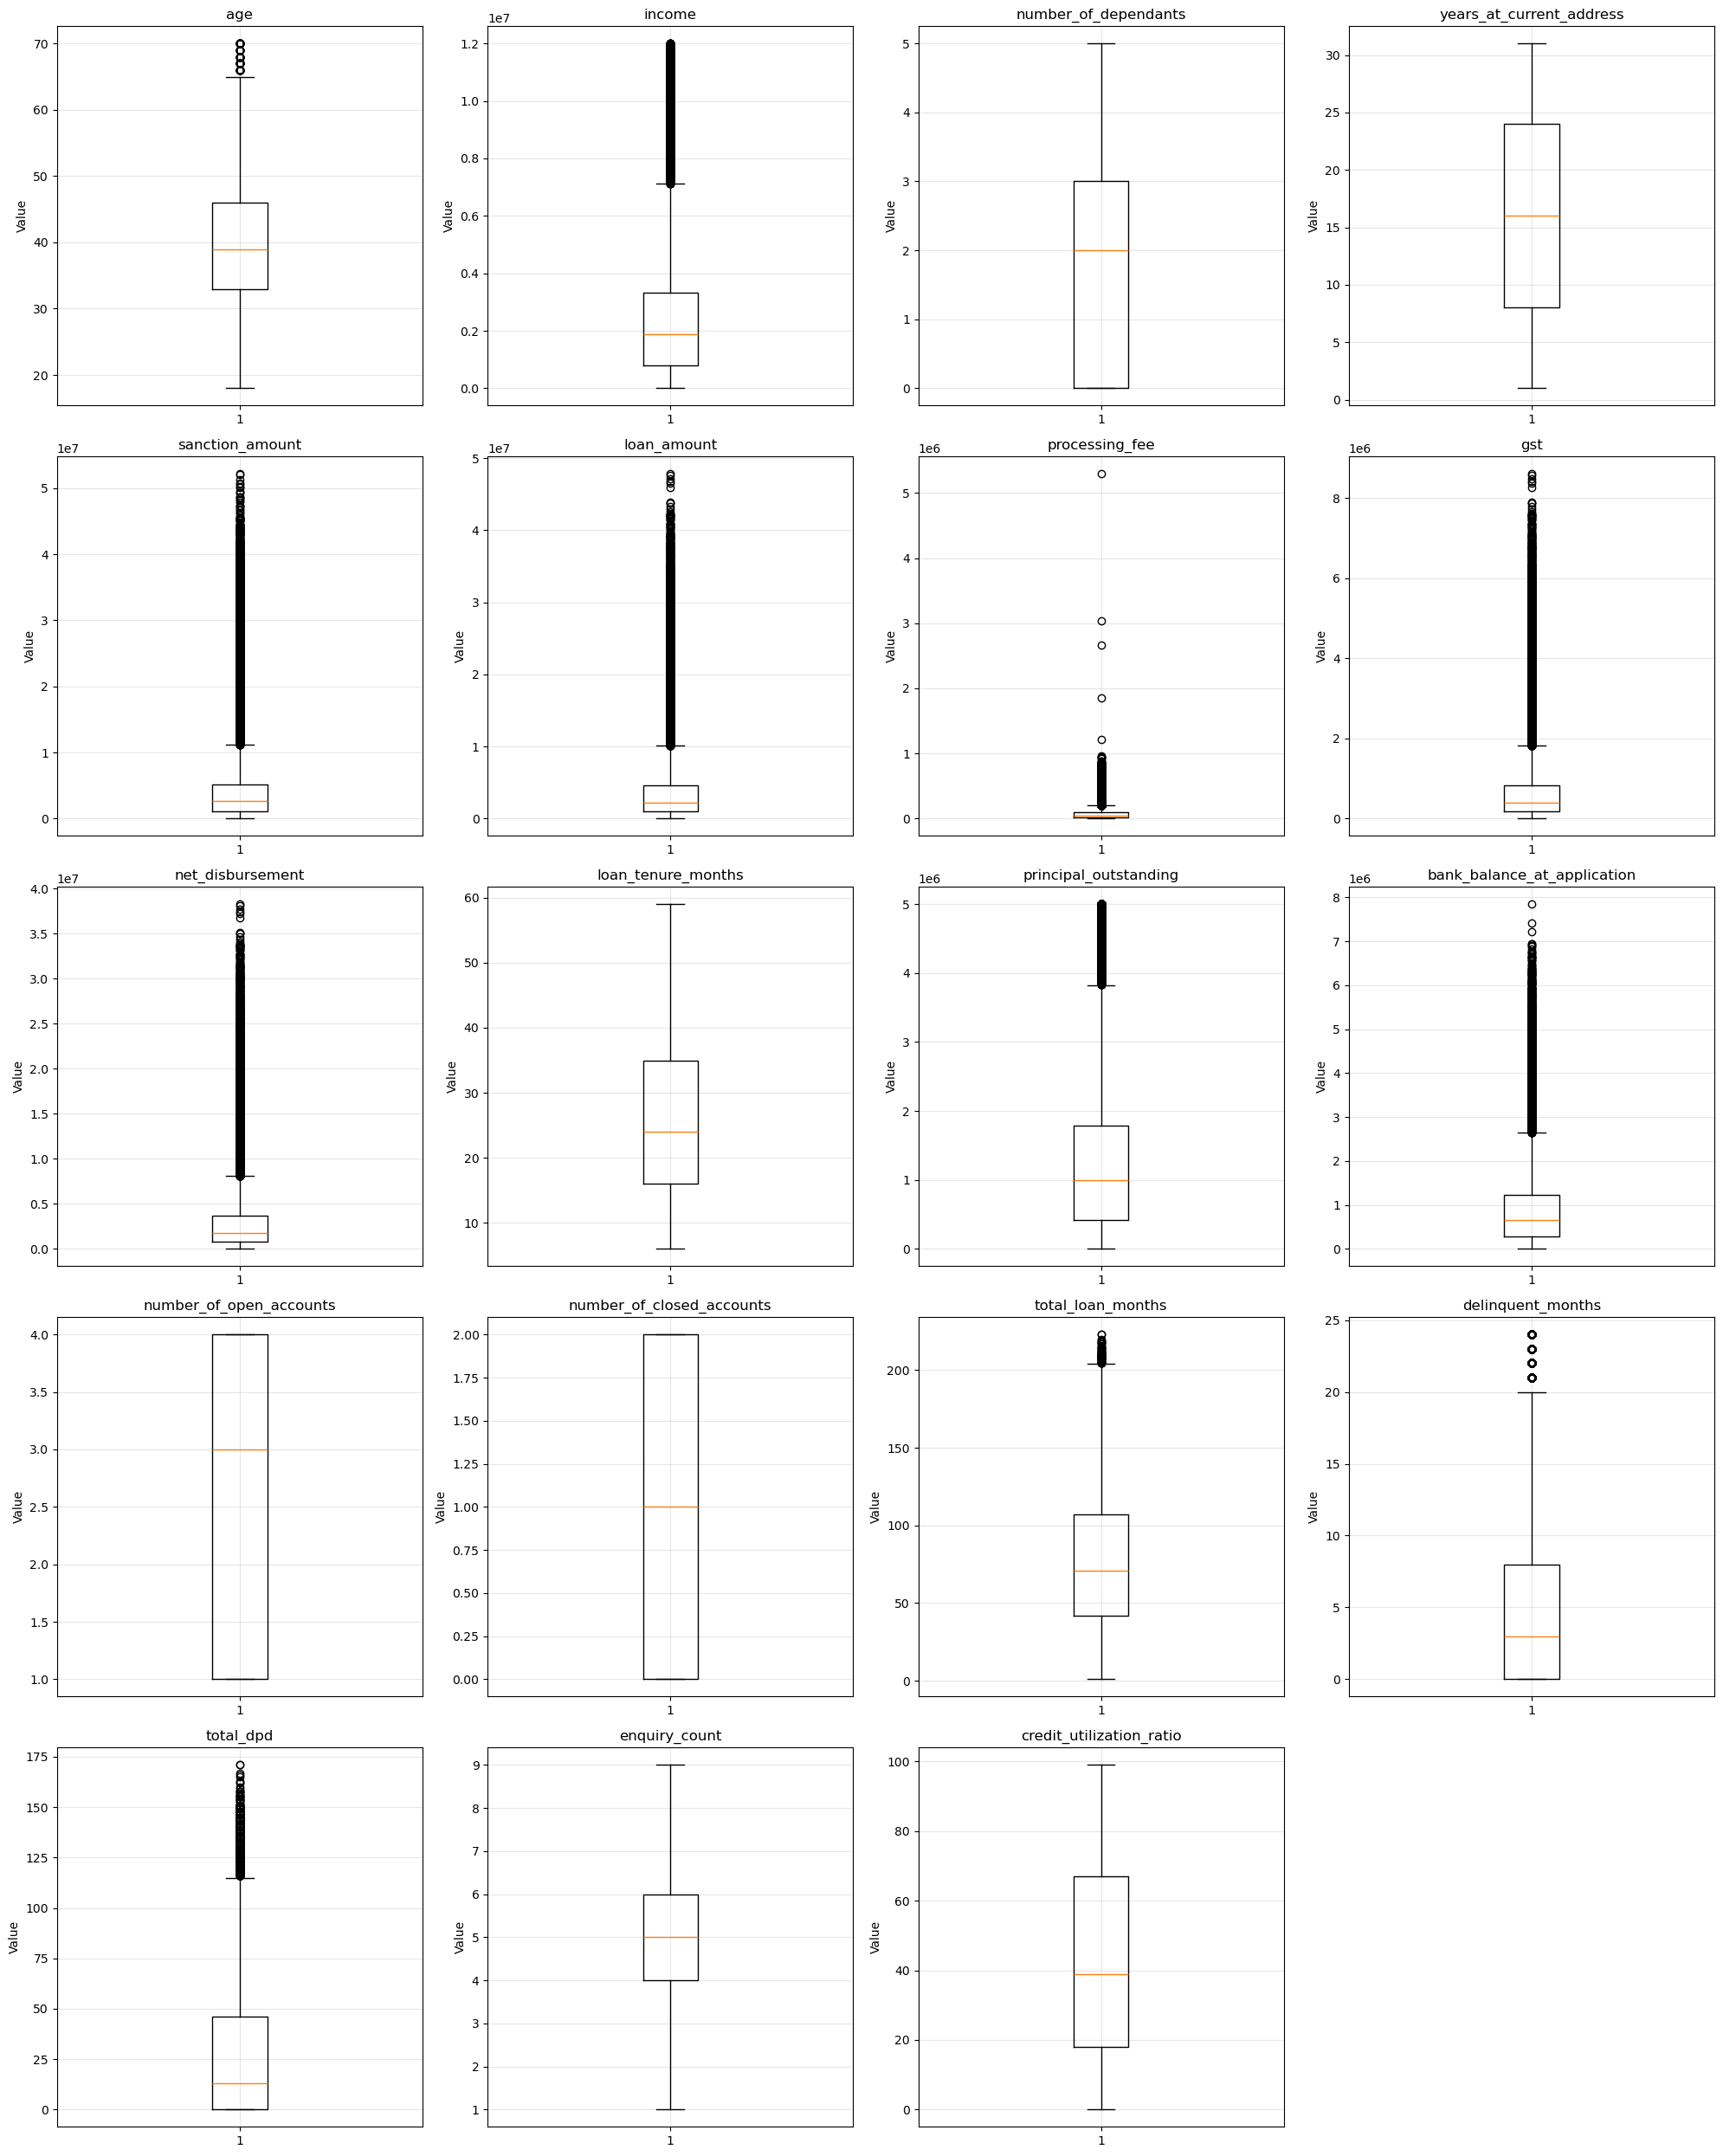

In [24]:
# Visualizing distribution of numeric column using box plot

# Calculate number of rows needed
n_cols = len(numeric_cols)
n_rows = int(np.ceil(n_cols / 4))

# Create subplots
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Plot box plots
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df_train[col].dropna())
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)

# Hide extra subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

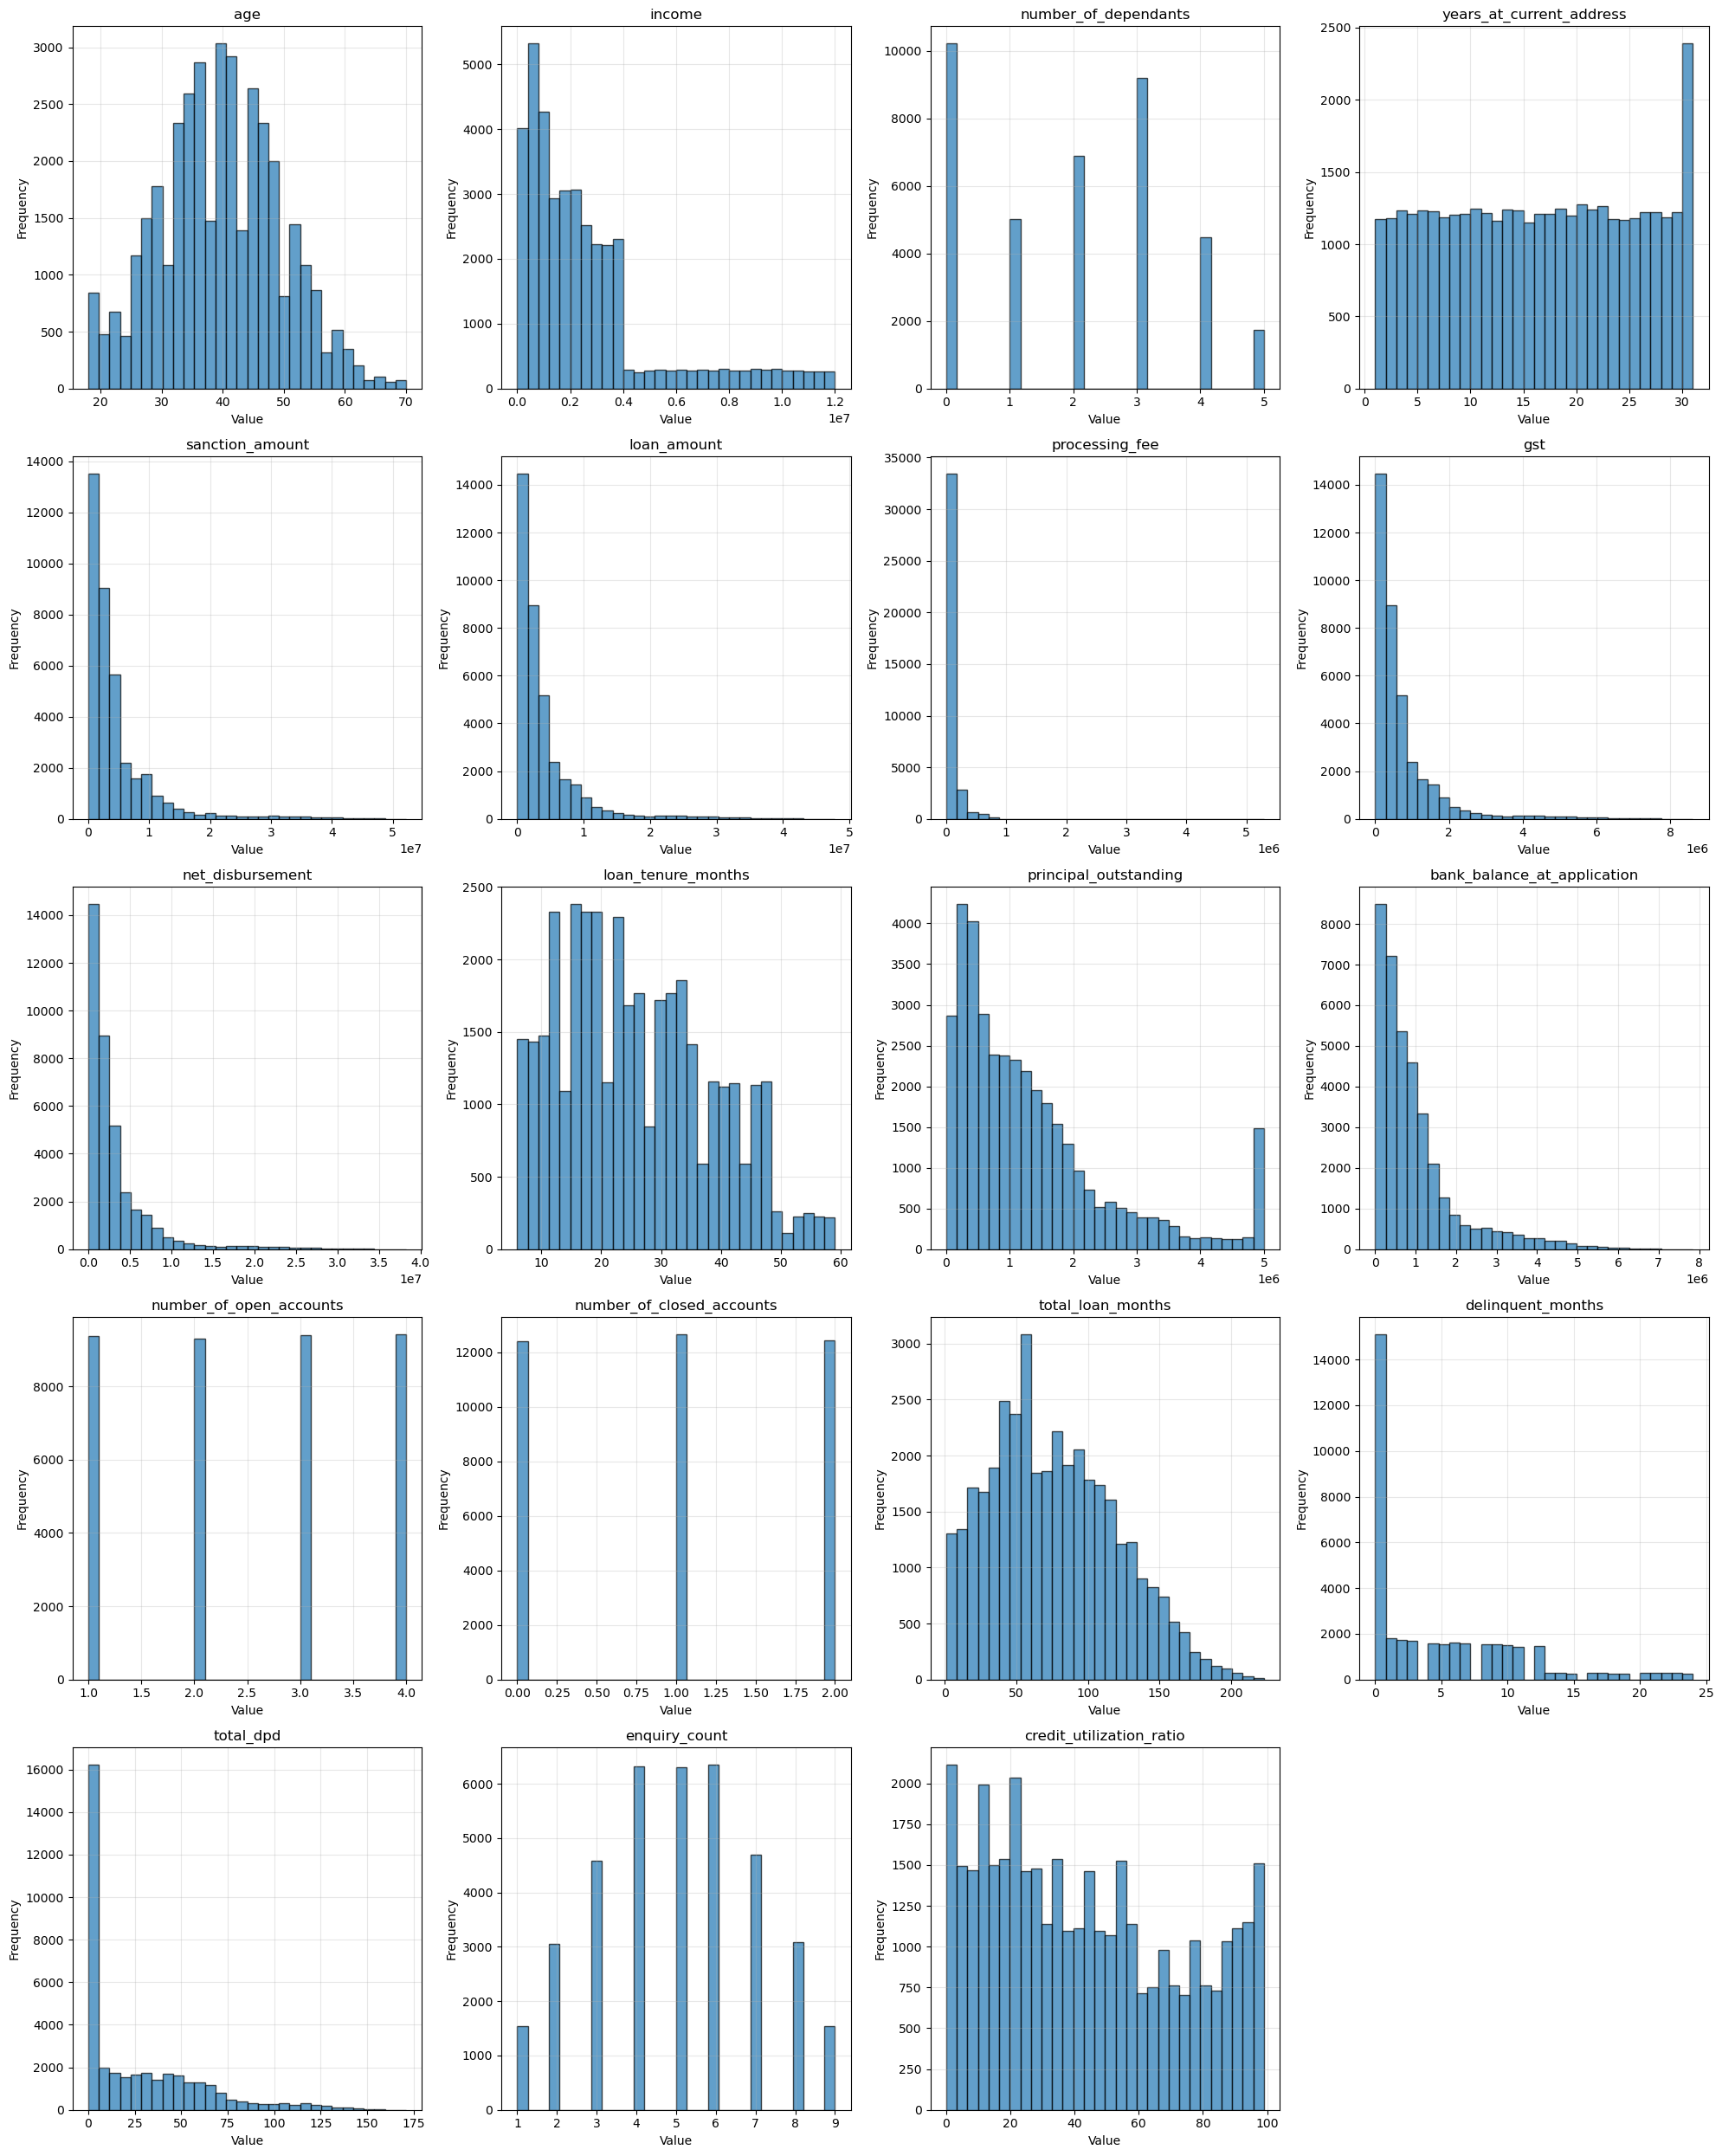

In [25]:
# Visualizing distribution of numeric column using histogram

# Calculate number of rows needed
n_cols = len(numeric_cols)
n_rows = int(np.ceil(n_cols / 4))

# Create subplots
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numeric_cols):
    axes[i].hist(df_train[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Hide extra subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [26]:
df_train['processing_fee'].describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [27]:
df_train[df_train['processing_fee']==df_train['processing_fee'].max()][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
9898,3626000,5293543.52


In [28]:
# Checking if there are any records where processing fee is greater than the outliers

df_train[df_train['processing_fee'] > df_train['loan_amount']][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [29]:
# Assuming we checked with business on these outliers and they reverted to assume a processing fee of 3%
# Checking records having ratio of processing_fee to loan_amount greater than 0.03

df_train[(df_train['processing_fee']/df_train['loan_amount'])>0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


* As these outliers, we can either replace these values of `processing_fee` by calculating a fixed percentage on the `loan amount` or else we can remove it.
* Since, there are only few records, we will get rid of it.

In [30]:
df_train_1 = df_train[(df_train['processing_fee']/df_train['loan_amount'])<0.03].copy()
df_train_1[(df_train_1['processing_fee']/df_train_1['loan_amount'])>0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee


In [31]:
# Applying the same on test data set as well

df_test = df_test[(df_test['processing_fee']/df_test['loan_amount'])<0.03].copy()
df_test.shape

(12497, 33)

In [32]:
# Analyzing categorical columns

categorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [33]:
for col in categorical_cols:
    print(col, ':', df_train_1[col].unique())

gender : ['M' 'F']
marital_status : ['Married' 'Single']
employment_status : ['Self-Employed' 'Salaried']
residence_type : ['Owned' 'Mortgage' 'Rented']
city : ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state : ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode : [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose : ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type : ['Secured' 'Unsecured']
default : [0 1]


In [34]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [35]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

In [36]:
# Checking if there are any outliers in gst column

df_train[(df_train['gst']/df_train['loan_amount'])>0.18]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


* No records present having GST amount greater than 18%.

## 3. Exploratory Data Analysis

In [37]:
numeric_cols

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

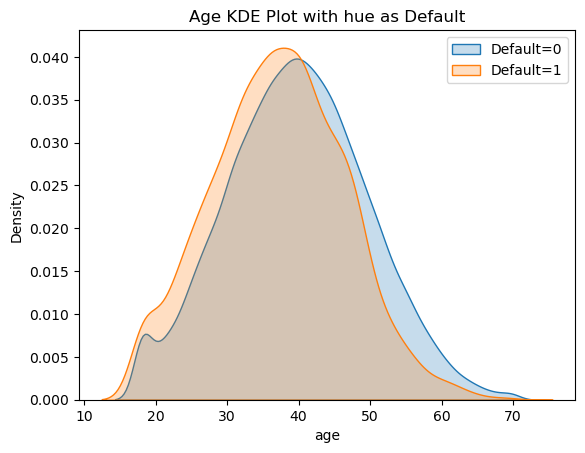

In [38]:
# Visualizing the individuals who defaulted as per age

sns.kdeplot(df_train_1[df_train_1['default']==0]['age'], fill=True, label='Default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['age'], fill=True, label='Default=1')
plt.title(f'Age KDE Plot with hue as Default')
plt.legend()
plt.show()

* Orange graph is more inclined towards younger age group indicating younger age group are more likely to default in their loans.

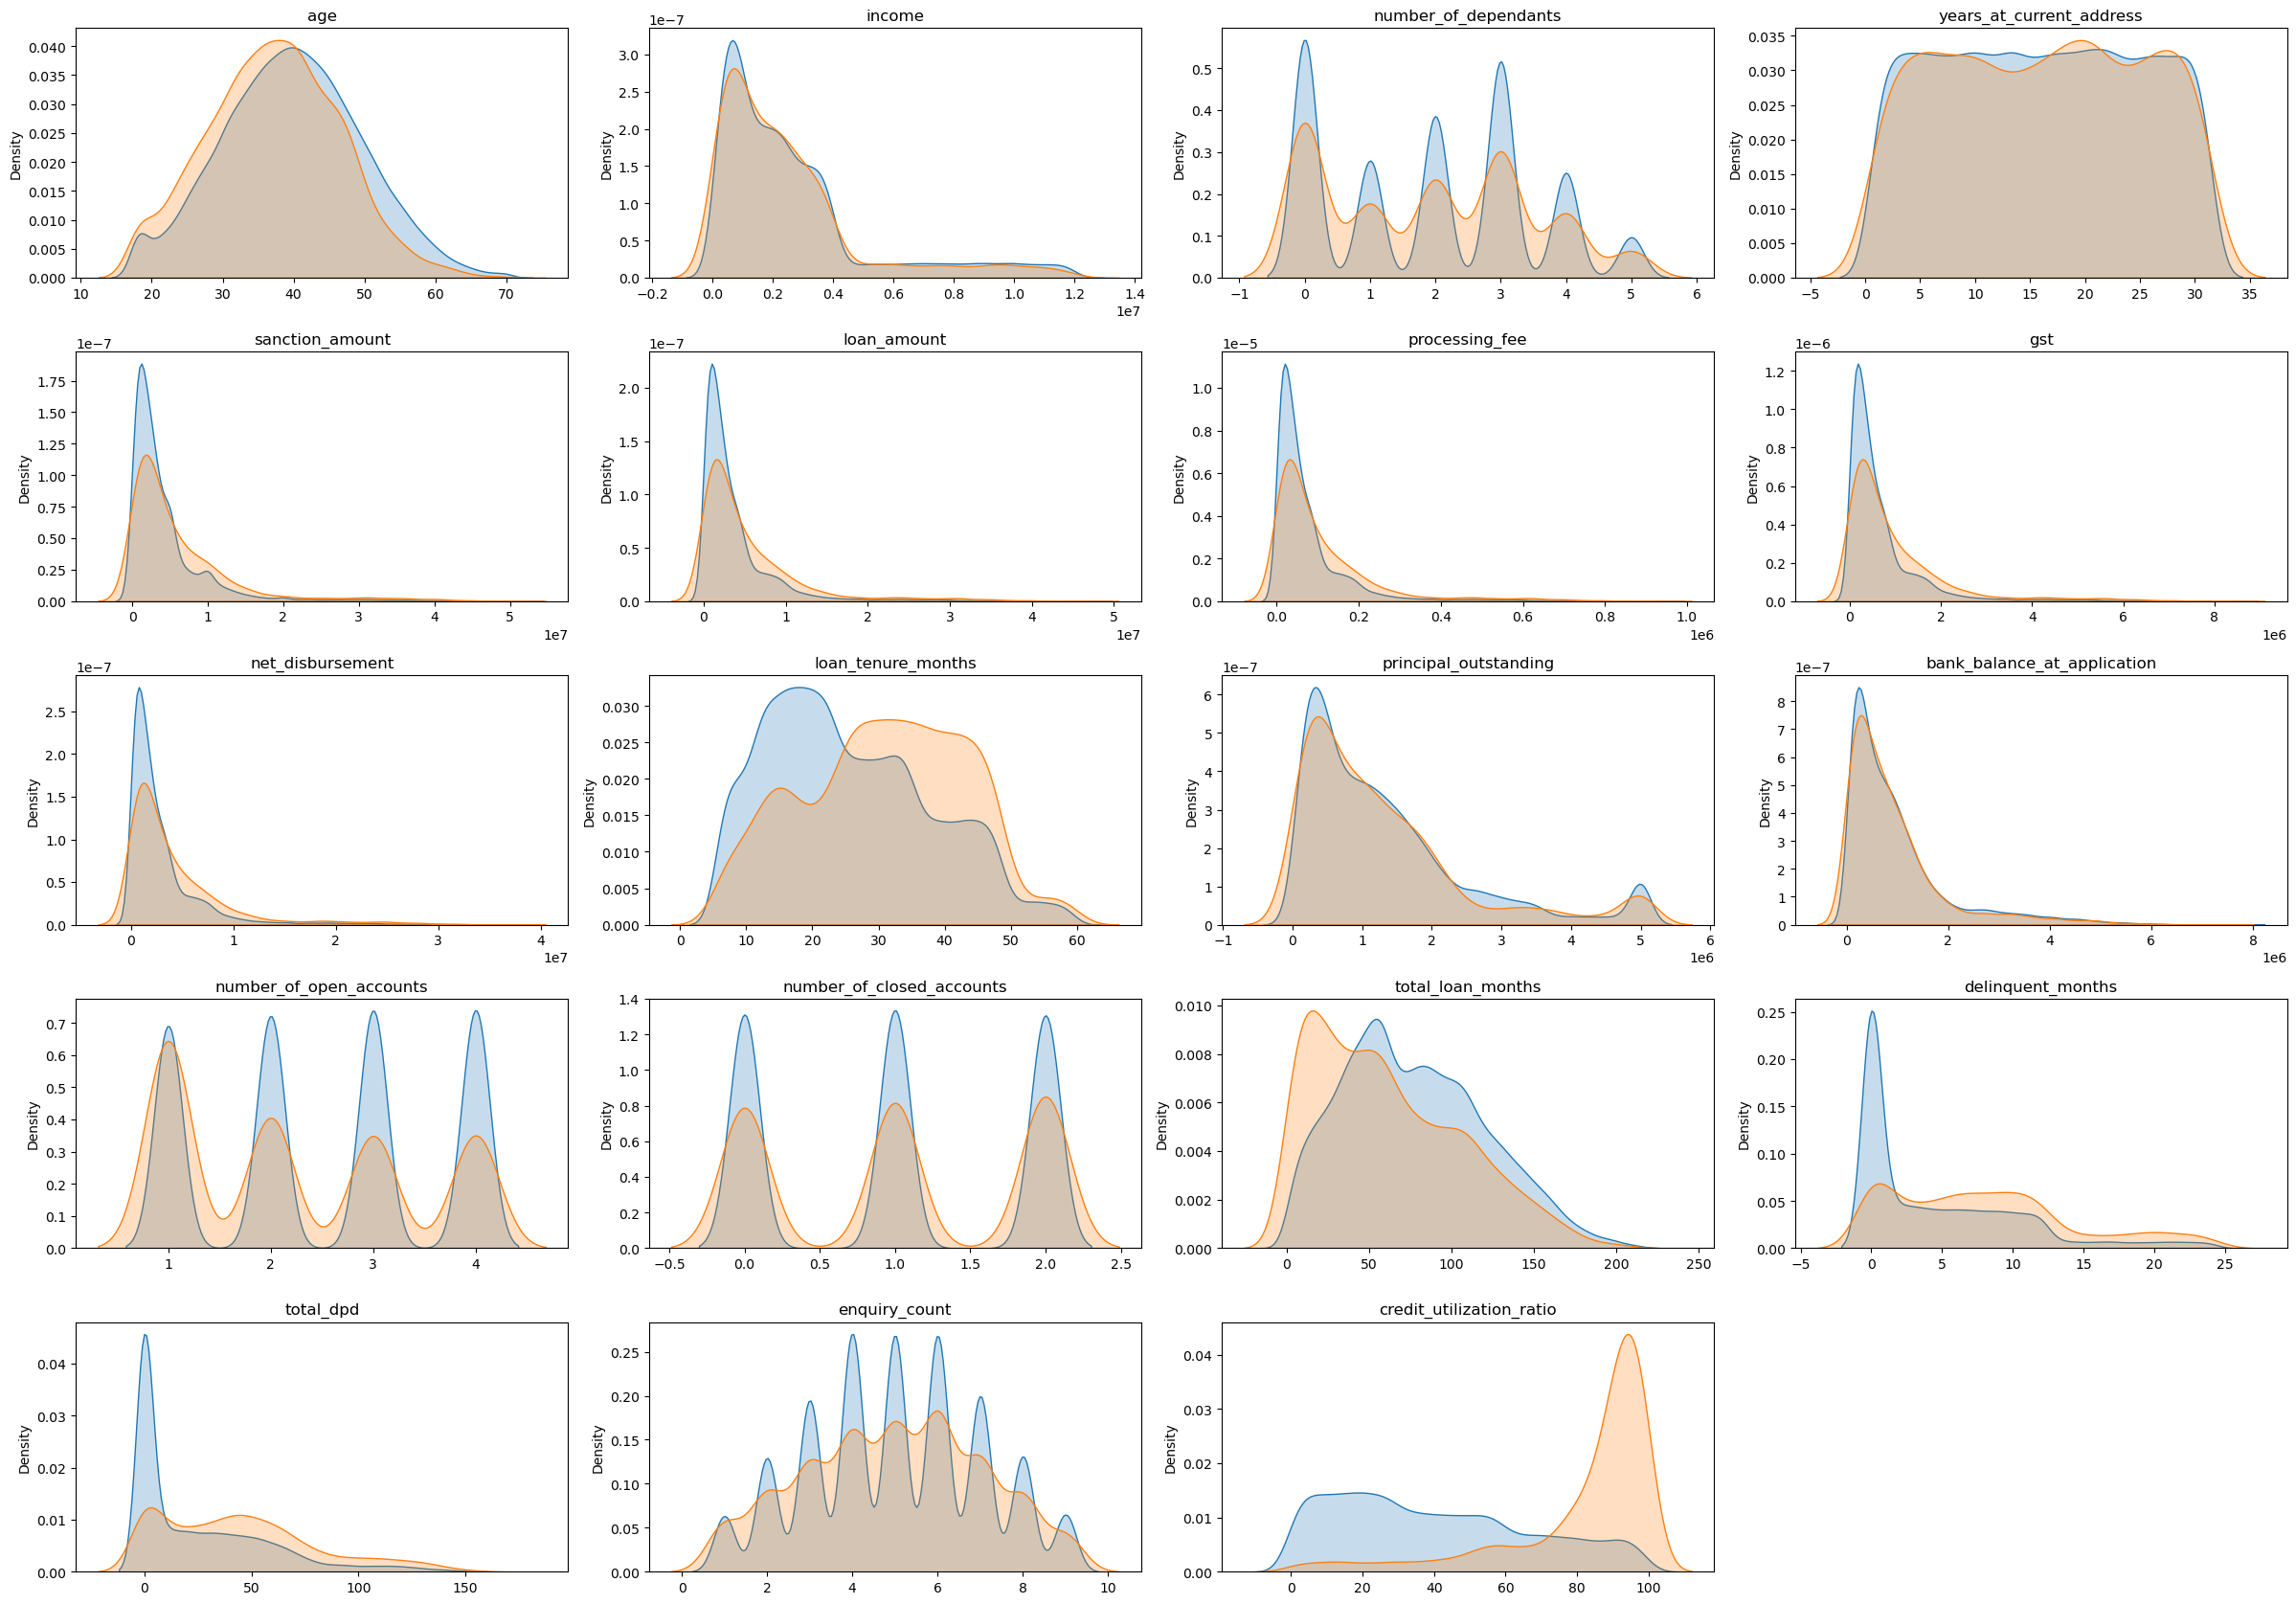

In [39]:
# Similarly, plotting it for all the numeric columns

plt.figure(figsize=(24, 20))

for i, col in enumerate(numeric_cols):
    plt.subplot(6, 4, i+1)
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='Default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='Default=1')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

### Insights:
* Columns like `loan_tenure_months`, `delinquent_months`, `total_dpd`, `credit_utilization_ratio` indicate that individuals with higher values are more like to default. These four features can act as a strong predictors in our model building process.
* The distribution of other columns did not give any meaningful insights.
* Surprisingly, columns like `income` & `loan_amount` did not act as strong predictors in this dataset. We will try doing feature engineering which can help in deriving some meaningful information.

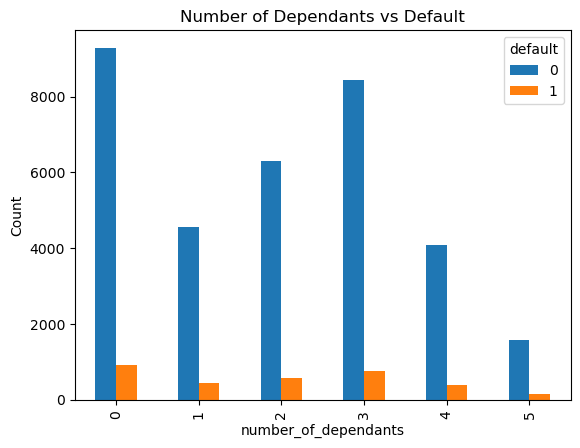

In [40]:
# Analyzing columns of `numbr_of_dependants` & `default`

crosstab = pd.crosstab(df_train_1['number_of_dependants'], df_train_1['default'])
crosstab.plot(kind='bar')
plt.title('Number of Dependants vs Default')
plt.ylabel('Count')
plt.show()

* Graph shows that people with higher number of dependants default less due to higher responsibility.

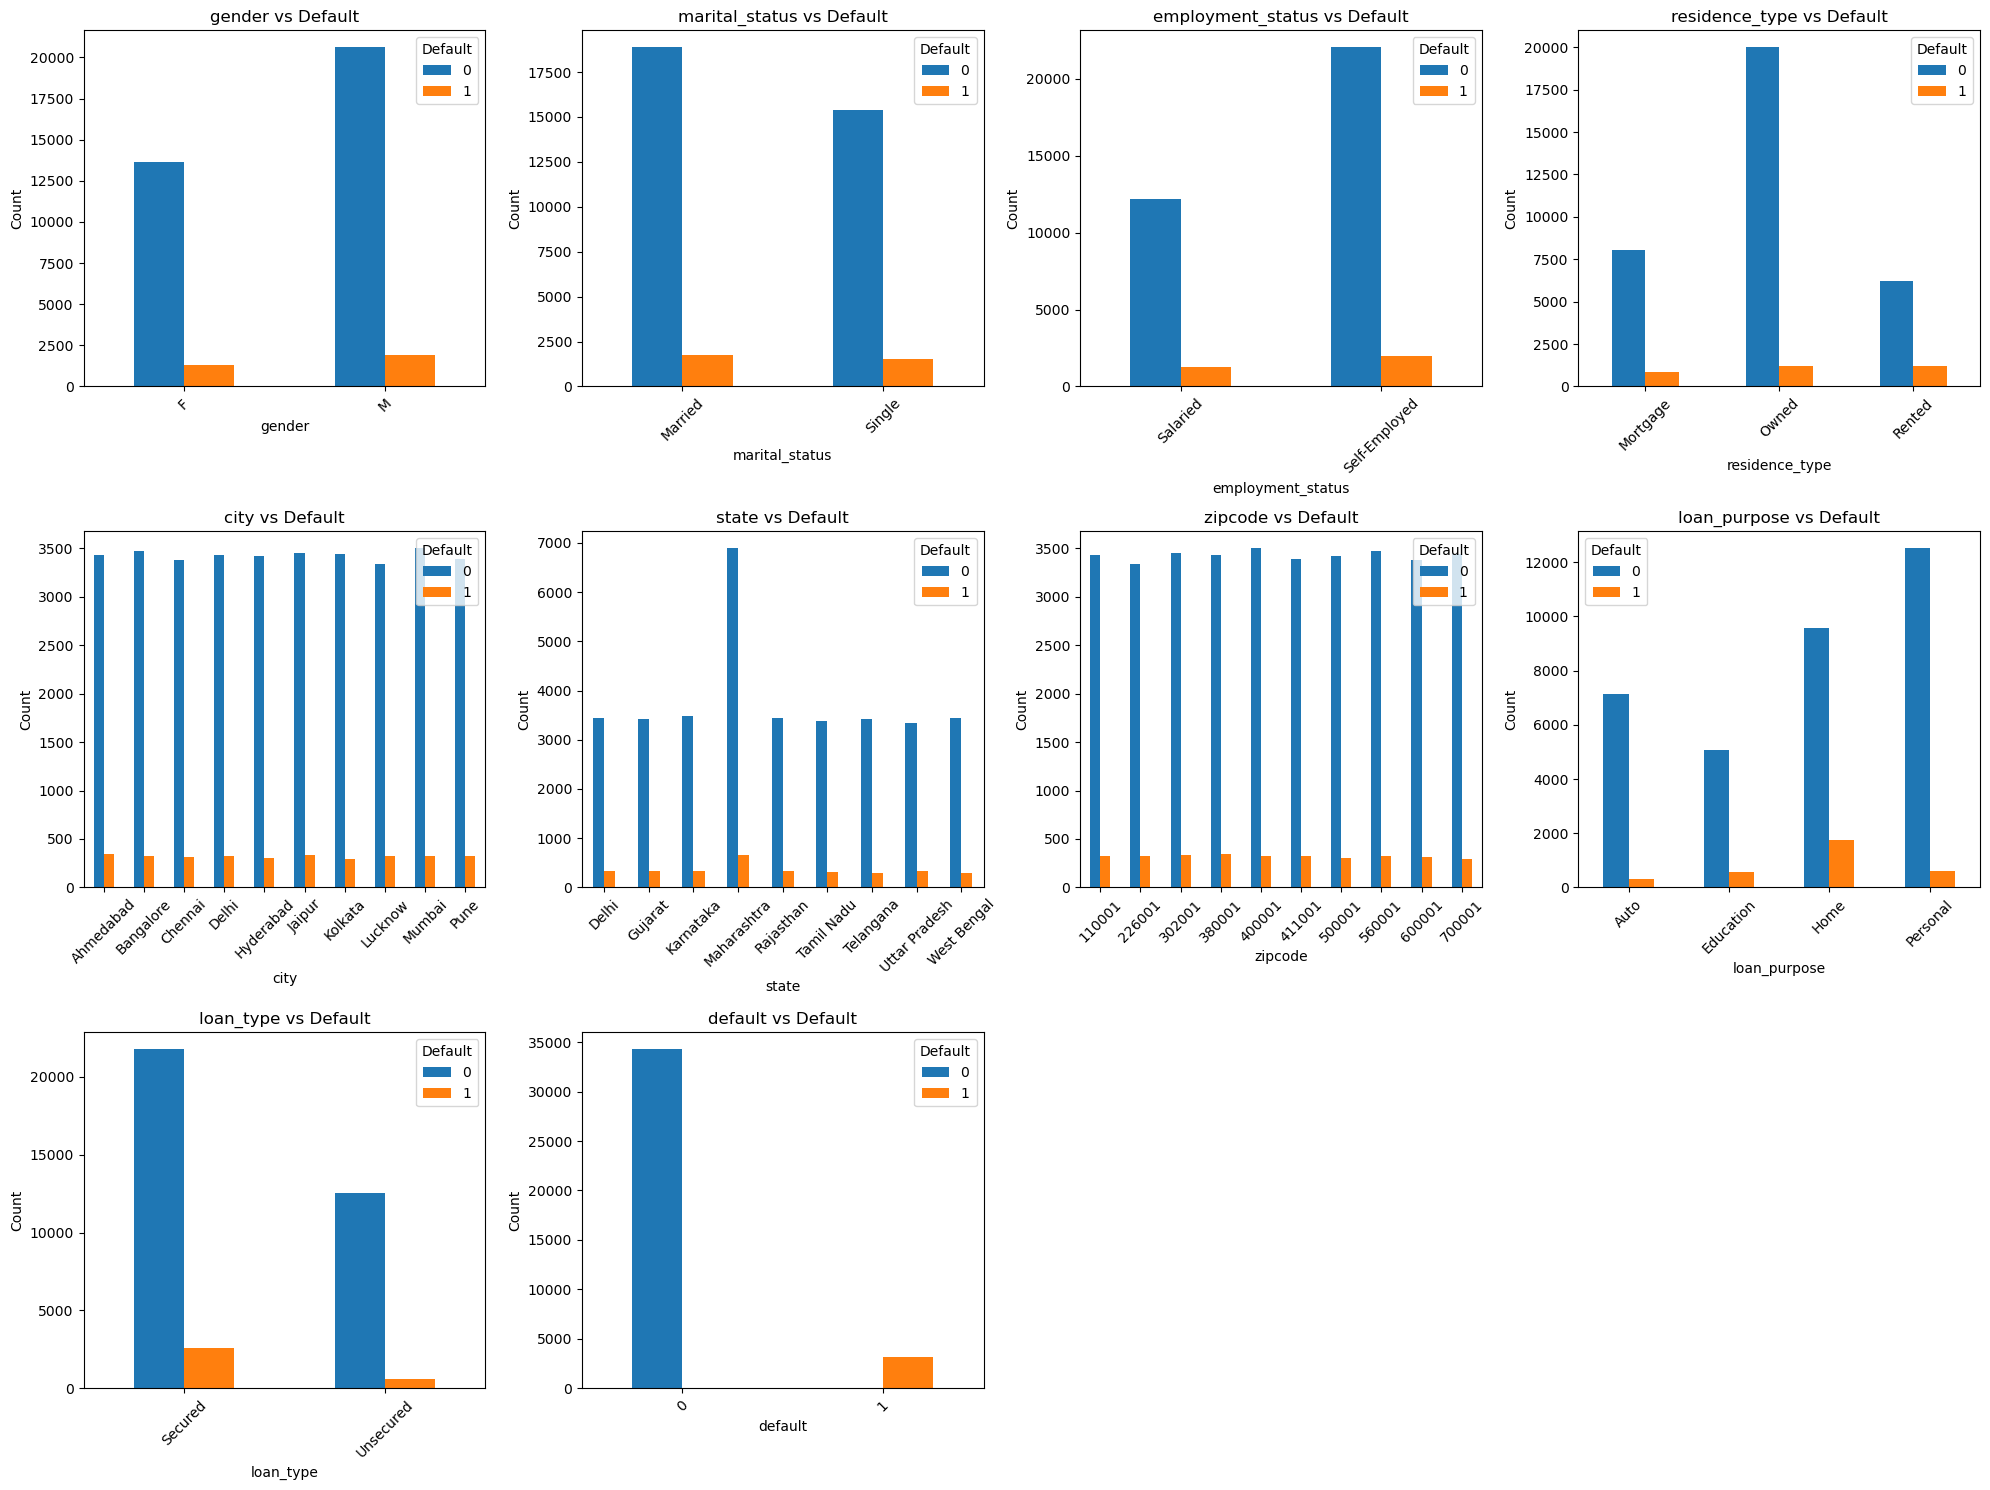

In [41]:
# Analyzing all categorical columns with 'default'

# Calculate number of rows needed
n_cols = len(categorical_cols)
n_rows = int(np.ceil(n_cols / 4))

# Create subplots
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Plot crosstab bar plots
for i, col in enumerate(categorical_cols):
    crosstab = pd.crosstab(df_train_1[col], df_train_1['default'])
    crosstab.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col} vs Default')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].legend(title='Default')
    axes[i].tick_params(axis='x', rotation=45)

# Hide extra subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

* As we can see from the graphs, individuals having owned residences received more loans as compared to that of the individuals having rented homes.
* Individuals opted for personal loans as compared to other types of loans but high default rate is observed in home loans.
* Individuals who opted for secured showed high rate of default as compared to individuals who opted for unsecured loans. This shows that individuals who opted for unsecured loans have good credit worthiness and are more responsible when it comes to adhering their loan obligations.

## 4. Feature Engineering

In [42]:
# As per business requirement, we need to calculate loan to income ratio

df_train_1[['loan_amount', 'income']]

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000
9040,1695000,1500000
13077,905000,1817000
...,...,...
28515,1420000,2470000
5558,2753000,2472000
45236,4479000,1329000
49228,1890000,1274000


In [43]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'], 2)
df_train_1['loan_to_income'].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

In [44]:
df_test['loan_to_income'] = round(df_test['loan_amount']/df_test['income'], 2)

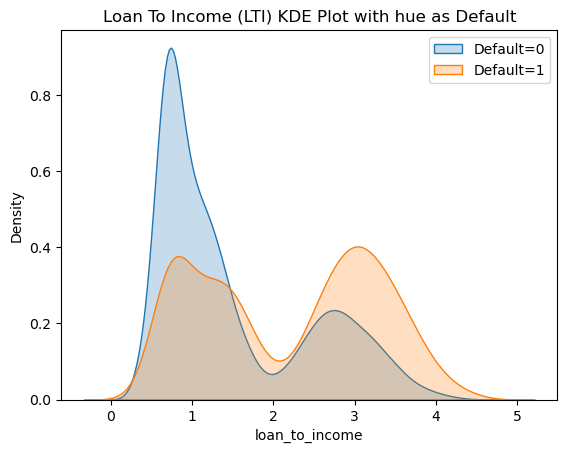

In [45]:
# Visualizing 'loan_to_income'  with 'default'

sns.kdeplot(df_train_1[df_train_1['default']==0]['loan_to_income'], fill=True, label='Default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['loan_to_income'], fill=True, label='Default=1')
plt.title(f'Loan To Income (LTI) KDE Plot with hue as Default')
plt.legend()
plt.show()

* As we can see from the graph, individuals who have low loan to income ratio default less as compared to the individuals with high loan to income ratio.

In [46]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [47]:
df_train_1[['delinquent_months', 'total_loan_months']]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [48]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100/df_train_1['total_loan_months']).round(1)
df_train_1[['delinquent_months', 'total_loan_months', 'delinquency_ratio']]

,delinquent_months,total_loan_months,delinquency_ratio
12746,20,152,13.20
32495,10,160,6.20
43675,12,54,22.20
9040,0,76,0.00
13077,0,60,0.00
...,...,...,...
28515,0,40,0.00
5558,14,52,26.90
45236,11,130,8.50
49228,0,88,0.00


In [49]:
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100/df_test['total_loan_months']).round(1)

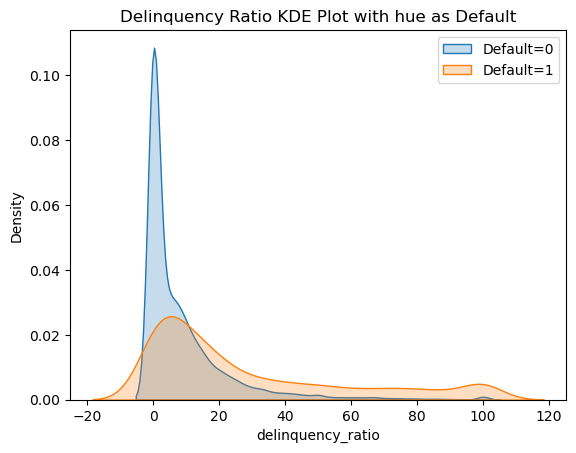

In [50]:
# Visualizing 'delinquency_ratio''  with 'default'

sns.kdeplot(df_train_1[df_train_1['default']==0]['delinquency_ratio'], fill=True, label='Default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['delinquency_ratio'], fill=True, label='Default=1')
plt.title(f'Delinquency Ratio KDE Plot with hue as Default')
plt.legend()
plt.show()

* Individuals having low delinquency ratio default less.

In [51]:
df_train_1['avg_dpd_per_delinquency'] = (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(1)
df_train_1['avg_dpd_per_delinquency'].describe()

count   22400.00
mean        5.50
std         1.41
min         1.00
25%         4.70
50%         5.50
75%         6.30
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

In [52]:
df_train_1['avg_dpd_per_delinquency'].isna().sum()

np.int64(15088)

* The reason we got so many null values in this column may be because zero values present in delinquent_months which resulted in null values.

In [53]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(1),
    0)

df_train_1['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

In [54]:
df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd']/df_test['delinquent_months']).round(1),
    0)

df_test['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

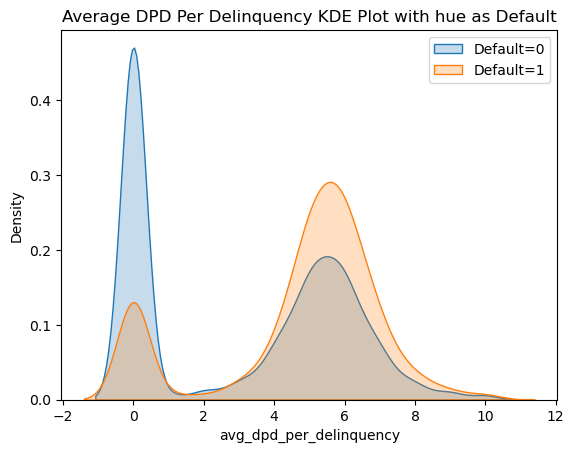

In [55]:
# Visualizing 'avg_dpd_per_delinquency'  with 'default'

sns.kdeplot(df_train_1[df_train_1['default']==0]['avg_dpd_per_delinquency'], fill=True, label='Default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['avg_dpd_per_delinquency'], fill=True, label='Default=1')
plt.title(f'Average DPD Per Delinquency KDE Plot with hue as Default')
plt.legend()
plt.show()

## 5. Feature Selection

In [56]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [57]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'], axis=1)
df_test = df_test.drop(['cust_id', 'loan_id'], axis=1)

In [58]:
# As we have already done feature engineering as per business requirement, we will remove those individual columns

df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                'total_loan_months', 'delinquent_months', 'total_dpd'], axis=1)

df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                'total_loan_months', 'delinquent_months', 'total_dpd'], axis=1)

df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [59]:
# Selecting numeric columns for calculating Variance Inflation Factor

df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [60]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

In [61]:
cols_to_scale = ['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency']

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

In [62]:
X_train.head(3)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,500001,...,0.42,1.00,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,400001,...,0.83,0.09,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62
43675,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,600001,...,0.49,0.33,0.17,0.00,0.50,0.38,0.00,0.76,0.22,0.56


In [63]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
19205,0.35,M,Married,Self-Employed,0.60,Owned,0.77,Jaipur,Rajasthan,302001,...,0.75,0.34,0.10,0.33,0.50,0.50,0.99,0.55,0.00,0.00
15514,0.48,F,Single,Self-Employed,0.00,Owned,0.73,Delhi,Delhi,110001,...,0.23,0.33,0.13,1.00,0.00,0.50,0.32,0.22,0.00,0.00


In [64]:
# Calculating VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [65]:
calculate_vif(X_train[cols_to_scale])

C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.55
1,number_of_dependants,2.72
2,years_at_current_address,3.36
3,sanction_amount,101.08
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.17
8,principal_outstanding,16.32
9,bank_balance_at_application,9.33


In [66]:
# As we can see high VIF, we will proceed in dropping those columns

features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif, axis=1)

In [67]:
numeric_columns =  X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [68]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.53
1,number_of_dependants,2.73
2,years_at_current_address,3.45
3,zipcode,5.61
4,loan_tenure_months,6.03
5,bank_balance_at_application,1.81
6,number_of_open_accounts,4.36
7,number_of_closed_accounts,2.39
8,enquiry_count,6.44
9,credit_utilization_ratio,2.95


In [69]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

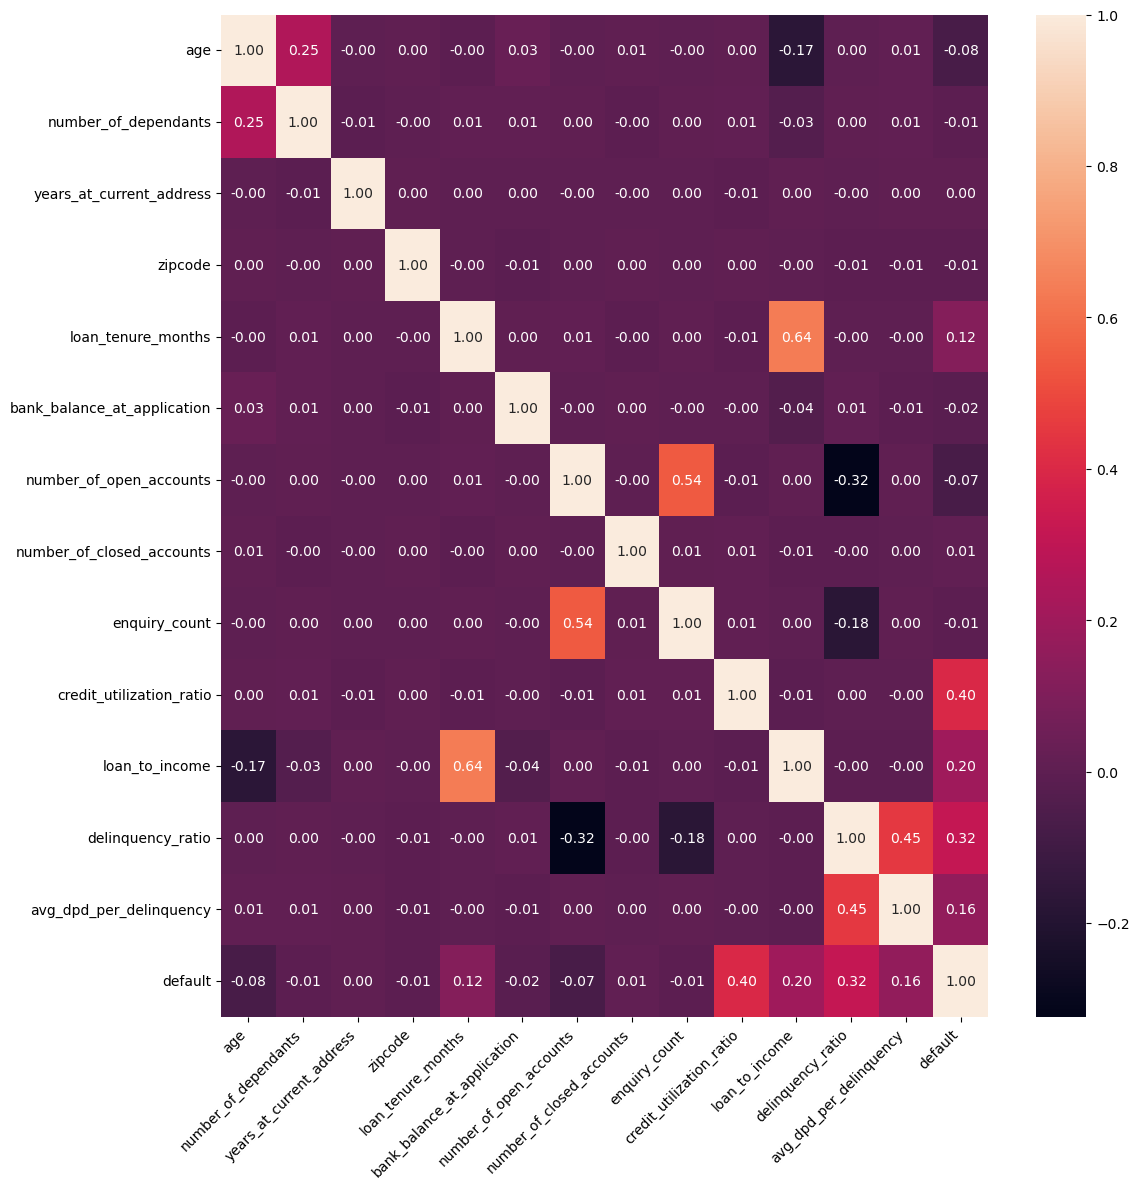

In [70]:
# Plotting correlation matrix

plt.figure(figsize=(12, 12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [71]:
categorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [72]:
X_train_1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [73]:
temp = pd.concat([X_train_1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count', 'sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


### Applying the concept of Weight of Evidence(WOE) & Information Value(IV) to find the best features

In [74]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    grouped['good_pct'] = grouped['good']/total_good
    grouped['bad_pct'] = grouped['bad']/total_bad
    grouped['woe'] = np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct'])*grouped['woe']

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [75]:
# Calculating IV values for all the categorical variables

iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), feature, 'default')
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')
    iv_values[feature] = iv

iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47641

In [76]:
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.35
19,delinquency_ratio,0.72
18,loan_to_income,0.48
20,avg_dpd_per_delinquency,0.40
10,loan_purpose,0.37
5,residence_type,0.25
12,loan_tenure_months,0.22
11,loan_type,0.16
0,age,0.09
14,number_of_open_accounts,0.08


In [77]:
# Selecting features which has IV greater than 0.02

selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

## 6. Feature Encoding

In [78]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [79]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,Owned,Home,Secured,0.42,1.00,0.36,0.41,0.13,0.59
32495,0.50,Owned,Education,Secured,0.83,0.67,0.05,0.31,0.06,0.62
43675,0.38,Mortgage,Home,Secured,0.49,0.00,0.00,0.76,0.22,0.56
9040,0.46,Mortgage,Education,Secured,0.64,0.67,0.88,0.19,0.00,0.00
13077,0.77,Owned,Personal,Unsecured,0.17,0.00,0.72,0.05,0.00,0.00


In [80]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.79,0.42,1.00,0.36,0.41,0.13,0.59,True,False,False,True,False,False
32495,0.50,0.83,0.67,0.05,0.31,0.06,0.62,True,False,True,False,False,False
43675,0.38,0.49,0.00,0.00,0.76,0.22,0.56,False,False,False,True,False,False
9040,0.46,0.64,0.67,0.88,0.19,0.00,0.00,False,False,True,False,False,False
13077,0.77,0.17,0.00,0.72,0.05,0.00,0.00,True,False,False,False,True,True


## 7. Model Building

* We will try first with Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [83]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.96     12497



In [84]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']  # Algorithm to use in the optimization problem
}

log_reg = LogisticRegression(max_iter=10000)  #Increased max_iter for convergence

random_search = RandomizedSearchCV(
    estimator = log_reg,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_encoded, y_train)

print(f'Best Parameters: {random_search.best_params_}')
print(f'Best Score: {random_search.best_score_}')

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'saga', 'C': np.float64(3792.690190732246)}
Best Score: 0.7578820896729832
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [85]:
# Randomized search with XGBoost

from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9,10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                  scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

print(f'Best Parameters: {random_search.best_params_}')
print(f'Best Score: {random_search.best_score_}')

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7883672970285227
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.76      0.83      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.87      0.90      0.89     12497
weighted avg       0.96      0.96      0.96     12497



#### We will try again by handling class imbalances

In [86]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [123]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(**random_search.best_params_)
model_xgb.fit(X_train_rus, y_train_rus)

y_pred = model_xgb.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.98      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



#### We will try now with over sampling using SMOTE Tomek

In [89]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34195
1    34195
Name: count, dtype: int64

In [90]:
model_lg = LogisticRegression()
model_lg.fit(X_train_smt, y_train_smt)

y_pred = model_lg.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



#### Hyperparameter tuning using Optuna

In [91]:
!pip install optuna

In [92]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [93]:
# Defining the objective function for Optuna

def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }
    model = LogisticRegression(**param, max_iter=10000)

    # calculate the cross-validated f1 score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-10-29 12:03:07,244] A new study created in memory with name: no-name-a7c7e728-0336-415e-85a0-9384e2bb8675
[I 2025-10-29 12:03:07,373] Trial 0 finished with value: 0.9449673608156237 and parameters: {'C': 1.281612648673862, 'solver': 'newton-cg', 'tol': 0.0010129875756490607, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9449673608156237.
[I 2025-10-29 12:03:07,449] Trial 1 finished with value: 0.769618792285984 and parameters: {'C': 0.0014566030072086622, 'solver': 'newton-cg', 'tol': 0.09647384991454419, 'class_weight': None}. Best is trial 0 with value: 0.9449673608156237.
[I 2025-10-29 12:03:07,602] Trial 2 finished with value: 0.9456355017852852 and parameters: {'C': 216.89827972344827, 'solver': 'newton-cg', 'tol': 3.227648797360008e-05, 'class_weight': None}. Best is trial 2 with value: 0.9456355017852852.
[I 2025-10-29 12:03:07,708] Trial 3 finished with value: 0.820469456794414 and parameters: {'C': 0.00010999706854351758, 'solver': 'newton-cg', 'tol': 2.35

In [94]:
print('Best Trial:')
trial = study_logistic.best_trial
print('F1-Score: {}'.format(trial.value))
print('Params:')
for key, value in trial.params.items():
    print('{}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on test set
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_pred, y_test)
print(report)

Best Trial:
F1-Score: 0.945796353313685
Params:
C: 114.84377336985659
solver: lbfgs
tol: 0.00015075352217357985
class_weight: balanced
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10683
           1       0.94      0.56      0.70      1814

    accuracy                           0.93     12497
   macro avg       0.94      0.78      0.83     12497
weighted avg       0.93      0.93      0.92     12497



#### Attempting with XGBoost & Hyperparameter tuning using Optuna

In [95]:
# Define the objective function for Optuna

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1 score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-10-29 12:03:15,082] A new study created in memory with name: no-name-4a2171de-b7c7-49cf-892e-eb64682b729a
[I 2025-10-29 12:03:15,753] Trial 0 finished with value: 0.9707706463279608 and parameters: {'lambda': 2.178507148848157, 'alpha': 0.08363866101393244, 'subsample': 0.6693040706852567, 'colsample_bytree': 0.4738123816024345, 'max_depth': 7, 'eta': 0.19975602465542144, 'gamma': 2.3650583340790208, 'scale_pos_weight': 2.4310613572463557, 'min_child_weight': 8, 'max_delta_step': 4}. Best is trial 0 with value: 0.9707706463279608.
[I 2025-10-29 12:03:16,308] Trial 1 finished with value: 0.9529356420890239 and parameters: {'lambda': 0.15154150559143398, 'alpha': 8.888503312169611, 'subsample': 0.4176947489073836, 'colsample_bytree': 0.959112696182082, 'max_depth': 4, 'eta': 0.23152808177785988, 'gamma': 5.656399325493951, 'scale_pos_weight': 9.247000703948666, 'min_child_weight': 10, 'max_delta_step': 2}. Best is trial 0 with value: 0.9707706463279608.
[I 2025-10-29 12:03:16,932

In [96]:
print('Best Trial:')
trial = study_xgb.best_trial
print('F1-Score: {}'.format(trial.value))
print('Params:')
for key, value in trial.params.items():
    print('{}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on test set
y_pred = best_model_xgb.predict(X_test_encoded)
report = classification_report(y_pred, y_test)
print(report)

Best Trial:
F1-Score: 0.9769058304834982
Params:
lambda: 0.04763525271795548
alpha: 0.0010020625993681586
subsample: 0.8439231804833136
colsample_bytree: 0.9375446665517683
max_depth: 10
eta: 0.14479777950876294
gamma: 0.050926030303699577
scale_pos_weight: 2.0403570054467526
min_child_weight: 2
max_delta_step: 1
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11166
           1       0.87      0.70      0.78      1331

    accuracy                           0.96     12497
   macro avg       0.92      0.84      0.88     12497
weighted avg       0.95      0.96      0.95     12497



In [97]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [98]:
y_pred = model_lg.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



* Decided to move forward with Logistic Regression model using Optuna

#### Calculating ROC & AUC

* Logistic Regression Model

In [99]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
probabilities

array([0.52271525, 0.00000872, 0.00507453, ..., 0.00189604, 0.84611767,
       0.59018986])

In [100]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
fpr[:10], tpr[:10], thresholds[:10]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754,
        0.00017509, 0.00017509, 0.00026263, 0.00026263, 0.00035017]),
 array([0.        , 0.0009311 , 0.15828678, 0.15828678, 0.17411546,
        0.17411546, 0.21787709, 0.21787709, 0.22625698, 0.22625698]),
 array([       inf, 1.        , 0.99955672, 0.99953806, 0.9994373 ,
        0.99943449, 0.99892606, 0.99891405, 0.99881138, 0.99876819]))

In [101]:
area = auc(fpr, tpr)
area

np.float64(0.983616396140232)

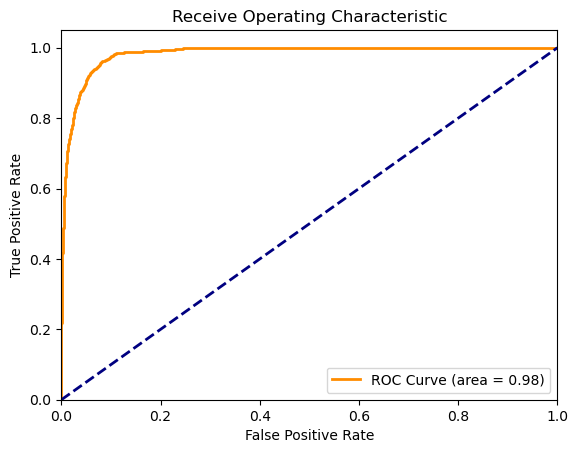

In [102]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receive Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [130]:
# With XGBoost

probabilities_xgb = best_model_xgb.predict_proba(X_test_encoded)[:,1]
probabilities_xgb

array([0.39954466, 0.00009102, 0.00086018, ..., 0.00059066, 0.33408606,
       0.46910864], dtype=float32)

In [134]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probabilities_xgb)
fpr_xgb[:10], tpr_xgb[:10], thresholds_xgb[:10]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754,
        0.00017509, 0.00017509, 0.00026263, 0.00026263, 0.00035017]),
 array([0.        , 0.0009311 , 0.2150838 , 0.2150838 , 0.22718808,
        0.22718808, 0.22998138, 0.22998138, 0.23370577, 0.23370577]),
 array([       inf, 0.9999453 , 0.99649847, 0.9964792 , 0.99622947,
        0.99616146, 0.9960828 , 0.9960814 , 0.99580884, 0.99577147],
       dtype=float32))

In [135]:
area_xgb = auc(fpr_xgb, tpr_xgb)
area_xgb

np.float64(0.985713670889419)

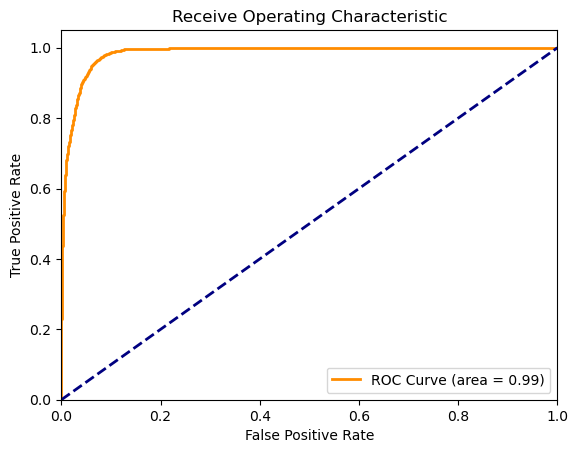

In [136]:
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % area_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receive Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 8. Model Evaluation: Rank Order & KS Statistic

In [104]:
df_eval = pd.DataFrame({
     'Default Truth': y_test,
     'Default Probability': probabilities
})
df_eval.head()

,Default Truth,Default Probability
19205,0,0.52
15514,0,0.00
30367,0,0.01
35347,0,0.01
41814,1,0.92


In [105]:
# Calculating deciles on 'Default Probability'

df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head()

,Default Truth,Default Probability,Decile
19205,0,0.52,8
15514,0,0.00,2
30367,0,0.01,6
35347,0,0.01,6
41814,1,0.92,9


In [106]:
df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({
   'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum()
}))
df_grouped.reset_index(inplace=True)
df_grouped

C:\Users\win10\AppData\Local\Temp\ipykernel_4824\1196600761.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.00,0.00,0.00,1250.00
1,1,0.00,0.00,0.00,1250.00
2,2,0.00,0.00,0.00,1249.00
3,3,0.00,0.00,0.00,1250.00
4,4,0.00,0.00,0.00,1250.00
5,5,0.00,0.00,0.00,1249.00
6,6,0.00,0.03,5.00,1245.00
7,7,0.03,0.21,9.00,1240.00
8,8,0.21,0.82,162.00,1088.00
9,9,0.82,1.00,898.00,352.00


In [107]:
df_grouped['Event Rate'] = df_grouped['Events']*100/(df_grouped['Events'] + df_grouped['Non-events'])
df_grouped['Non-event Rate'] = df_grouped['Non-events']*100/(df_grouped['Events'] + df_grouped['Non-events'])
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.00,0.00,0.00,1250.00,0.00,100.00
1,1,0.00,0.00,0.00,1250.00,0.00,100.00
2,2,0.00,0.00,0.00,1249.00,0.00,100.00
3,3,0.00,0.00,0.00,1250.00,0.00,100.00
4,4,0.00,0.00,0.00,1250.00,0.00,100.00
5,5,0.00,0.00,0.00,1249.00,0.00,100.00
6,6,0.00,0.03,5.00,1245.00,0.40,99.60
7,7,0.03,0.21,9.00,1240.00,0.72,99.28
8,8,0.21,0.82,162.00,1088.00,12.96,87.04
9,9,0.82,1.00,898.00,352.00,71.84,28.16


In [108]:
df_grouped = df_grouped.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.82,1.00,898.00,352.00,71.84,28.16
1,8,0.21,0.82,162.00,1088.00,12.96,87.04
2,7,0.03,0.21,9.00,1240.00,0.72,99.28
3,6,0.00,0.03,5.00,1245.00,0.40,99.60
4,5,0.00,0.00,0.00,1249.00,0.00,100.00
5,4,0.00,0.00,0.00,1250.00,0.00,100.00
6,3,0.00,0.00,0.00,1250.00,0.00,100.00
7,2,0.00,0.00,0.00,1249.00,0.00,100.00
8,1,0.00,0.00,0.00,1250.00,0.00,100.00
9,0,0.00,0.00,0.00,1250.00,0.00,100.00


In [109]:
df_grouped['Cum Events'] = df_grouped['Events'].cumsum()
df_grouped['Cum Non-events'] = df_grouped['Non-events'].cumsum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00
1,8,0.21,0.82,162.00,1088.00,12.96,87.04,1060.00,1440.00
2,7,0.03,0.21,9.00,1240.00,0.72,99.28,1069.00,2680.00
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00


In [110]:
df_grouped['Cum Event Rate'] = df_grouped['Cum Events']*100/df_grouped['Events'].sum()
df_grouped['Cum Non-event Rate'] = df_grouped['Cum Non-events']*100/df_grouped['Non-events'].sum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00,83.61,3.08
1,8,0.21,0.82,162.00,1088.00,12.96,87.04,1060.00,1440.00,98.70,12.61
2,7,0.03,0.21,9.00,1240.00,0.72,99.28,1069.00,2680.00,99.53,23.46
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00,100.00,34.36
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00,100.00,45.29
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00,100.00,56.24
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00,100.00,67.18
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00,100.00,78.11
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00,100.00,89.06
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00,100.00,100.00


In [111]:
df_grouped['KS'] = abs(df_grouped['Cum Event Rate'] - df_grouped['Cum Non-event Rate'])
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00,83.61,3.08,80.53
1,8,0.21,0.82,162.00,1088.00,12.96,87.04,1060.00,1440.00,98.70,12.61,86.09
2,7,0.03,0.21,9.00,1240.00,0.72,99.28,1069.00,2680.00,99.53,23.46,76.07
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00,100.00,34.36,65.64
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00,100.00,45.29,54.71
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00,100.00,56.24,43.76
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00,100.00,67.18,32.82
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00,100.00,78.11,21.89
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00,100.00,89.06,10.94
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00,100.00,100.00,0.00


* The highest KS value is 86.09% which is in Decile 8. This indicates that model's performance in distinguishing between events and non-events is most significant at this decile.
* If KS is in top 3 deciles and score above 40, then it is considered to be a good predictive model.

In [128]:
# Calculating for Logistic Regression
gini_coefficient = 2*area - 1

print('AUC:', area)
print('Gini Coefficient:', gini_coefficient)

AUC: 0.983616396140232
Gini Coefficient: 0.967232792280464


* An AUC of 0.98 indicates that the model is really good at distinguishing between events and non-events.
* A Gini Coefficient of 0.96 confirms that model is highly effective in its predictions.

In [137]:
# Calculating for XGBoost model

gini_coefficient_xgb = 2*area_xgb - 1
print('AUC:', area_xgb)
print('Gini Coefficient:', gini_coefficient_xgb)

AUC: 0.985713670889419
Gini Coefficient: 0.9714273417788379


## 9. Exporting the Model

In [113]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [114]:
cols_to_scale

['age',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [115]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

#### Finalizing the model and visualizing feature importance

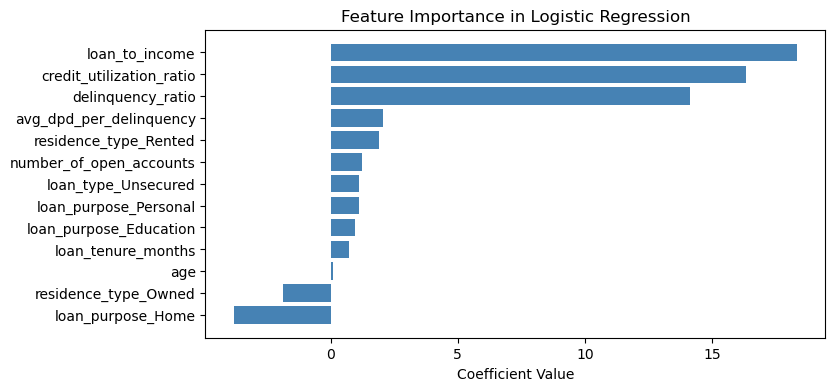

In [116]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [117]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'model_data.joblib')

['model_data.joblib']

In [118]:
final_model.coef_, final_model.intercept_

(array([[ 0.09947369,  0.70807816,  1.22341975, 16.33651945, 18.34544524,
         14.11908915,  2.04922592, -1.87651234,  1.88833502,  0.94334592,
         -3.80976363,  1.10968746,  1.10968746]]),
 array([-21.46738236]))

In [141]:
holdout_df = X_test_encoded.copy()
holdout_df["defaulted"] = y_test

holdout_df.to_parquet("holdout_encoded.parquet", index=False)
print("holdout_encoded.parquet created with RAW features")

holdout_encoded.parquet created with RAW features


## Conclusion
* After performing Optuna tuning, we proceeded with selecting Logistic Regression as the model was performing better in terms of recall and due to better explainability.
* We achieved an AUC score of 0.98 for Logistic Regression model which indicates that model is good separating events and non-events.
* We also achieved a gini-coefficient of 0.96 which indicates that model is really good in its predictions.
* We also achieved a high KS Statistic value of 86.09% at Decile 8 which means that the model is performing well at this Decile.
* We also fulfilled the business criteria of achieving it in the first three deciles.
* We will proceed further with our next step of business presentation, UI and model deployment using Streamlit.

In [142]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [143]:
X_train.shape

(37488, 26)

In [144]:
X_test.shape

(12497, 26)